## **IMPORTING LIBRARIES**

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

## **DATA PREPROCESSING**

In [3]:
#Importing Dataset
dataset = pd.read_csv('train.csv')
dataset

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [4]:
#Observing how many unique values dataset has for each coloumn
dataset.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [5]:
#Observing data types
dataset.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [6]:
#A general inference about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


### Handling Null

In [7]:
#Checking for null values
dataset.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
#Observing null value percentage
dataset.isna().mean()*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [9]:
#Analysing education
dataset.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

**NULL IN EDUCATION**

Education is a nominal categorical variable so null imputation can be done with mode. If education turns out to be a very good feature then null imputation with mode will change data integrity resulting in a bad model. Imputing nulls with a 'Not Defined' will help us in identifying patterns of these null values. So we will **impute null with 'Not Defined'**.

In [10]:
#Analysing previous_year_rating
dataset.previous_year_rating.value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [11]:
#Observing Null values of previous year rating with respect to education
dataset[dataset.previous_year_rating.isna()]['education'].value_counts()

Bachelor's          3265
Below Secondary      347
Master's & above     127
Name: education, dtype: int64

In [12]:
#Observing Null values of previous year rating with respect to length of service
dataset[dataset.previous_year_rating.isna()]['length_of_service'].value_counts()

1    4124
Name: length_of_service, dtype: int64

**NULL IN PREVIOUS_YEAR_RATING**

Ordinal categorical variable with null value percentage ~7.5%


**Missing Values might indicate FRESHERS or NEW JOINEES** because

- Length of service for all is equal to 1. This 1 might indicate their training period.

- Maximum have their education qualification as bachelors. Minimum have their education qualification as masters. Usually, people having masters already has some cooperate experience. If length of service indicates total work experience, then it means they are all freshers. If length of service indicates work experience in this specific company, then it means they are all new joinees

- Ratings include (1, 2, 3, 4, 5). There is nothing as 0, which means the people who did not have a previous year might have left the previous year rating column as null. 

Based on these inferences, null values are **MNAR** (Missing Not at Random) and should be imputed with 0 indicating they are all new joinees or freshers and did not have a previous year in the company.
{In the EDA PPT, it is written NULL is **MAR**. Please Ignore that}



In [14]:
#Handling nulls in education (filling it with 'Not Defined')
dataset['education'].fillna(value = 'Not Defined', inplace=True)

In [15]:
#Null imputation in previous_year_rating (filling it with 0)
dataset.fillna(value=0, inplace = True)

### Handling Duplicates

In [16]:
#Checking Duplicate rows
dataset.duplicated().sum()

0

In [17]:
#Checking Duplicate columns
dataset_transposed = dataset.T
dataset_transposed.duplicated().sum()

0

There are no duplicates in the dataframe

### Splitting Data

In [18]:
#Splitting the dataset into Dependent and Independent variables
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, :-1] #X is the featureset. Dataframe excluding Target Variable (is_promoted)
y = dataset.iloc[:, -1:] #y is the target variable (is_promoted)

In [19]:
#Splitting the dataframe into training and test sets (72 percent train, 28 percent test)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.72, random_state = 42)

In [20]:
#Further splitting the test set into validation and testing sets (40 percent Validation, 60 percent test)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, train_size = 0.4, random_state = 42)

In [21]:
#Observing Shapes of the splitted dataframes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_validation.shape, y_validation.shape)

(39461, 13) (39461, 1)
(9209, 13) (9209, 1)
(6138, 13) (6138, 1)


## **EDA**

In [22]:
#Concating Featureset with target of the training set for EDA
dataset_eda = pd.concat([X_train, y_train], axis = 1)
dataset_eda

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
50114,6829,Sales & Marketing,region_14,Bachelor's,m,other,1,41,4.0,6,0,0,52,0
5038,20709,Finance,region_7,Master's & above,m,sourcing,1,33,5.0,7,0,0,71,1
26158,74525,Technology,region_33,Bachelor's,f,other,1,33,1.0,2,0,0,79,0
48838,74802,Finance,region_2,Bachelor's,m,sourcing,1,27,3.0,5,0,0,59,0
13179,11415,Operations,region_27,Bachelor's,f,other,1,32,3.0,3,0,0,55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44732,70143,Procurement,region_22,Master's & above,f,sourcing,3,36,3.0,4,0,0,67,0
54343,48082,Procurement,region_2,Bachelor's,f,sourcing,1,27,0.0,1,0,0,68,0
38158,62588,Operations,region_11,Bachelor's,f,sourcing,1,34,5.0,7,1,0,65,0
860,61087,Analytics,region_15,Master's & above,m,other,3,35,5.0,3,0,0,86,0


department
Analytics            0.099526
Finance              0.085929
HR                   0.053695
Legal                0.052069
Operations           0.091076
Procurement          0.096960
R&D                  0.066298
Sales & Marketing    0.073800
Technology           0.109237
Name: is_promoted, dtype: float64


<AxesSubplot:title={'center':'Department as a factor for promotion'}, xlabel='Department', ylabel='Probability of getting a promotion'>

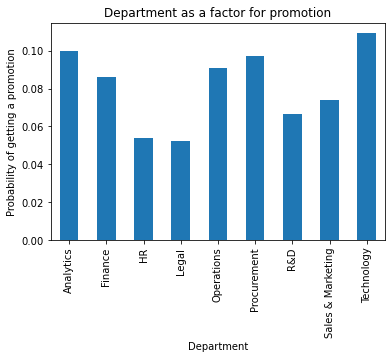

In [23]:
#Grouping by Department on the basis of getting a promotion
print(dataset_eda.groupby('department')['is_promoted'].mean())
dataset_eda.groupby('department')['is_promoted'].mean().plot(kind = 'bar', xlabel = 'Department', ylabel = 'Probability of getting a promotion', title = 'Department as a factor for promotion')

This gives us a brief idea about what kind of a growth each department has. Departments with less probability of getting a promotion signifies leveling up in that department is tough or there aren't many levels to climb. HR and Legal has low probability as compared to others which is quite reasonable as in an organization this department has very few members and thus not much levels to climb hence lower promotions. Departments like Technology, Analytics and Procurement is usually a bigger division where there are more levels depending upon the company and hence more promotion opportunities which is quite evident from the barplot. 

education
Bachelor's          0.082789
Below Secondary     0.090278
Master's & above    0.100769
Not Defined         0.057143
Name: is_promoted, dtype: float64


<AxesSubplot:title={'center':'Education as a factor for promotion'}, xlabel='Education', ylabel='Probability of getting a promotion'>

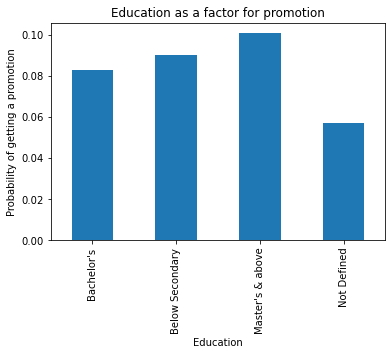

In [24]:
#Grouping by education on the basis of getting a promotion
print(dataset_eda.groupby('education')['is_promoted'].mean())
dataset_eda.groupby('education')['is_promoted'].mean().plot(kind = 'bar', xlabel = 'Education', ylabel = 'Probability of getting a promotion', title = 'Education as a factor for promotion')

Not defined are those which had null values in education. According to the barplot, Not Defined has a low probability of getting a promotion as compared to the others. This might imply those categories who somehow managed to get the job without the bare minimum education qualification and now facing difficulties in getting a promotion. Employees with a master's and above education qualification has a higher probability in getting a promotion as it should be. This can be considered as a good feature.

In [25]:
#Grouping by Gender, to observe promotion ratio
dataset.groupby('gender')['is_promoted'].mean()

gender
f    0.089934
m    0.083151
Name: is_promoted, dtype: float64

recruitment_channel
other       0.084993
referred    0.124853
sourcing    0.086808
Name: is_promoted, dtype: float64


<AxesSubplot:title={'center':'Recruitment Channel as a factor for promotion'}, xlabel='Recruitment Channel', ylabel='Probability of getting a promotion'>

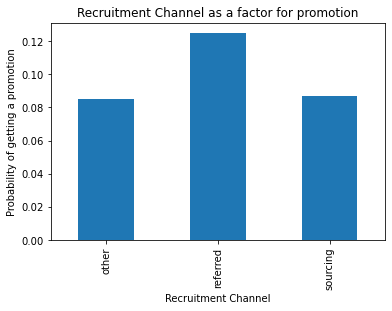

In [26]:
#Grouping by recruitment channel on the basis of getting a promotion
print(dataset_eda.groupby('recruitment_channel')['is_promoted'].mean())
dataset_eda.groupby('recruitment_channel')['is_promoted'].mean().plot(kind = 'bar', xlabel = 'Recruitment Channel', ylabel = 'Probability of getting a promotion', title = 'Recruitment Channel as a factor for promotion')

The above figure shows that employees whose recruitment channel was **referred** has a higher probability of getting promoted.
Recruiment Channel can be a good feature

no_of_trainings
1     0.089555
2     0.077601
3     0.069785
4     0.060172
5     0.021505
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
Name: is_promoted, dtype: float64


<AxesSubplot:title={'center':'No of Trainings as a factor for promotion'}, xlabel='No of Trainings', ylabel='Probability of getting a promotion'>

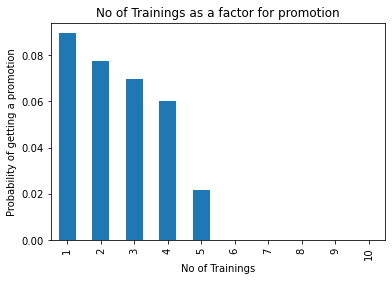

In [27]:
#Grouping by No of Trainings on the basis of getting a promotion
print(dataset_eda.groupby('no_of_trainings')['is_promoted'].mean())
dataset_eda.groupby('no_of_trainings')['is_promoted'].mean().plot(kind = 'bar', xlabel = 'No of Trainings', ylabel = 'Probability of getting a promotion', title = 'No of Trainings as a factor for promotion')

Employees with lesser no of trainings has a higher probability in getting promotion. This is because this organization might conduct extra trainings for the weaker employees who aren't promotion deserving. This can be a good feature.

{'20 - 30': 0.08605769230769231, '30 - 40': 0.09371245494593512, '40 up': 0.07230010384215992}


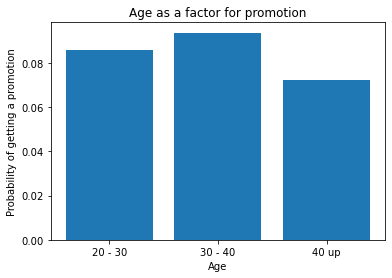

In [28]:
#Finding promotion probability on the basis of age of employees (binning into segments)
age = {'20 - 30': dataset_eda.query('age > 20 and age < 30')['is_promoted'].mean(),
      '30 - 40': dataset_eda.query('age > 30 and age < 40')['is_promoted'].mean(),
      '40 up': dataset_eda.query('age > 40')['is_promoted'].mean()}
print(age)
plt.bar(*zip(*age.items()))
plt.title('Age as a factor for promotion')
plt.xlabel('Age')
plt.ylabel('Probability of getting a promotion')
plt.show()

Employees having age between 30 - 40 has a slightly higher probability in getting a promotion. Might be a feature though not a good one since the difference between these categories probabilities is not that high.

region
region_17    0.143106
region_4     0.140638
region_28    0.131303
region_25    0.123729
region_3     0.123404
region_23    0.120425
region_22    0.115933
region_7     0.107891
region_1     0.103365
region_13    0.095289
region_30    0.088983
region_15    0.080271
region_12    0.080229
region_2     0.079920
region_8     0.079914
region_14    0.079310
region_16    0.077216
region_27    0.076539
region_10    0.073375
region_20    0.067769
region_26    0.061300
region_19    0.057994
region_31    0.054519
region_5     0.052727
region_11    0.052687
region_6     0.048980
region_32    0.043210
region_29    0.041429
region_33    0.040404
region_21    0.039604
region_24    0.032609
region_9     0.022436
region_34    0.019324
region_18    0.000000
Name: is_promoted, dtype: float64


<AxesSubplot:title={'center':'Region as a factor for promotion'}, xlabel='Region', ylabel='Probability of getting a promotion'>

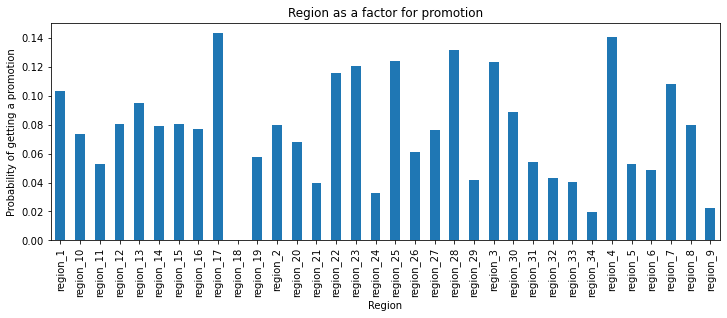

In [29]:
#Grouping on the basis of region on the basis of promotion
print(dataset_eda.groupby('region')['is_promoted'].mean().sort_values(ascending = False))
dataset_eda.groupby('region')['is_promoted'].mean().plot(kind = 'bar', xlabel = 'Region', ylabel = 'Probability of getting a promotion', title = 'Region as a factor for promotion', figsize = (12,4))

Regions with a higher promotion probability might signify that specific region has growth, good upper management so that employees learn from the best and perform better or that region might include headquarters where there is higher opportunities for promotions. All in all this could be used as a feature.

previous_year_rating
5.0    0.166765
0.0    0.085953
4.0    0.078459
3.0    0.074926
2.0    0.041859
1.0    0.014263
Name: is_promoted, dtype: float64


<AxesSubplot:title={'center':'Previous Year Rating as a factor for promotion'}, xlabel='Previous Year Rating', ylabel='Probability of getting a promotion'>

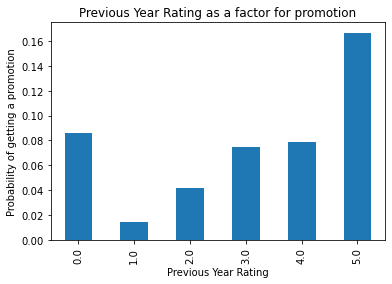

In [30]:
#Grouping by previous year rating on the basis of getting a promotion
print(dataset_eda.groupby('previous_year_rating')['is_promoted'].mean().sort_values(ascending = False))
dataset_eda.groupby('previous_year_rating')['is_promoted'].mean().plot(kind = 'bar', xlabel = 'Previous Year Rating', ylabel = 'Probability of getting a promotion', title = 'Previous Year Rating as a factor for promotion')

There is high difference between values. It clearly shows employees with higher previous year rating has a higher chance of getting a promotion. 0.0 signifies employees with no previous year (new joinees or freshers) and their probability of getting a promotion is also very high. This might be because freshers start from a very grassroot level and getting a promotion is easy in that level (Intern to a Full Time Employee). All in all this is a very good feature.

{'Less than 10': 0.08747917162580338, '10 - 20': 0.08331786973464465, '20 - 30': 0.061465721040189124, 'More than 30': 0.07317073170731707}


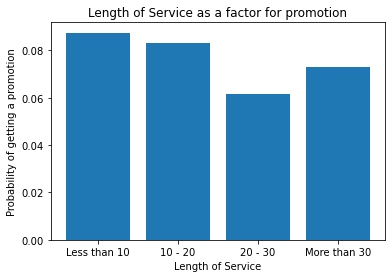

In [31]:
#Finding promotion probability on the basis of length of Service (binning into segments)
los = {'Less than 10': dataset_eda.query('length_of_service < 10')['is_promoted'].mean(),
      '10 - 20': dataset_eda.query('length_of_service >= 10 and length_of_service < 20')['is_promoted'].mean(),
      '20 - 30': dataset_eda.query('length_of_service >= 20 and length_of_service < 30')['is_promoted'].mean(),
      'More than 30': dataset_eda.query('length_of_service >= 30')['is_promoted'].mean()}

print(los)
plt.bar(*zip(*los.items()))
plt.title('Length of Service as a factor for promotion')
plt.xlabel('Length of Service')
plt.ylabel('Probability of getting a promotion')
plt.show()

Employees with lesser length of service are more prone to getting promotions. It might be because employees with higher length of service might be inefficient since they are stuck on the same profile for a long time. Although the differences between the values are very less, still it can be considered as a feature.

KPIs_met >80%
0    0.041071
1    0.169966
Name: is_promoted, dtype: float64


<AxesSubplot:title={'center':'KPI as a factor for promotion'}, xlabel="KPI's met > 80 %", ylabel='Probability of getting a promotion'>

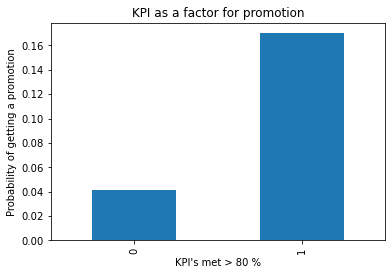

In [32]:
#Grouping by KPI's met on the basis of getting a promotion
print(dataset_eda.groupby('KPIs_met >80%')['is_promoted'].mean())
dataset_eda.groupby('KPIs_met >80%')['is_promoted'].mean().plot(kind = 'bar', xlabel = "KPI's met > 80 %", ylabel = 'Probability of getting a promotion', title = 'KPI as a factor for promotion')

1 denotes yes and 0 denotes no on the x-axis. Employees who met the KPI criteria (more than 80 %) has significantly a higher probability of getting a promotion as compared to those who couldn't. This is a very good feature as KPI is one of the key factors for promotion.

awards_won?
0    0.077993
1    0.448313
Name: is_promoted, dtype: float64


<AxesSubplot:title={'center':'Awards won as a factor for promotion'}, xlabel='Awards Won?', ylabel='Probability of getting a promotion'>

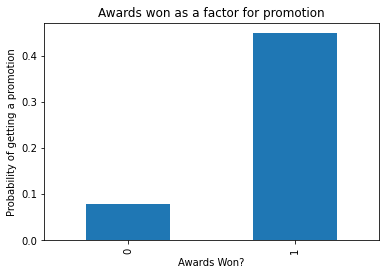

In [33]:
#Grouping by awards won on the basis of getting a promotion
print(dataset_eda.groupby('awards_won?')['is_promoted'].mean())
dataset_eda.groupby('awards_won?')['is_promoted'].mean().plot(kind = 'bar', xlabel = "Awards Won?", ylabel = 'Probability of getting a promotion', title = 'Awards won as a factor for promotion')

1 denotes yes and 0 denotes on the x-axis. Employees who have won an award has a very high chance in getting a promotion. This is a very good feature and is one of the biggest factors for promotion. 

{'99 - 89': 0.7679558011049724, '89 - 79': 0.12115136760704569, '79 - 69': 0.10847714773373791, '69 - 59': 0.08574264797121231, '59 - 49': 0.052733226971198255, '49 - 39': 0.039444195428059166}


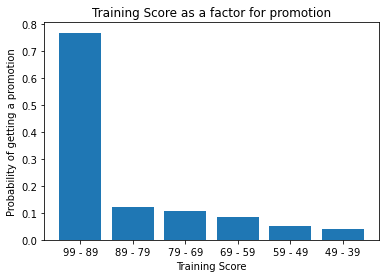

In [34]:
#Finding promotion probability on the basis of training score (binning into segments)
training_score = {
    '99 - 89': dataset_eda.query('avg_training_score <= 99 and avg_training_score > 89')['is_promoted'].mean(),
    '89 - 79': dataset_eda.query('avg_training_score <= 89 and avg_training_score > 79')['is_promoted'].mean(),
    '79 - 69': dataset_eda.query('avg_training_score <= 79 and avg_training_score > 69')['is_promoted'].mean(),
    '69 - 59': dataset_eda.query('avg_training_score <= 69 and avg_training_score > 59')['is_promoted'].mean(),
    '59 - 49': dataset_eda.query('avg_training_score <= 59 and avg_training_score > 49')['is_promoted'].mean(),
    '49 - 39': dataset_eda.query('avg_training_score <= 49 and avg_training_score > 39')['is_promoted'].mean()
}

print(training_score)
plt.bar(*zip(*training_score.items()))
plt.title('Training Score as a factor for promotion')
plt.xlabel('Training Score')
plt.ylabel('Probability of getting a promotion')
plt.show()

From the bar plot, it is quite evident that employees with a higher training score especially in the bracket (99 - 89) is more probable in getting a promotion. Training Score is an extremely good feature.

<AxesSubplot:>

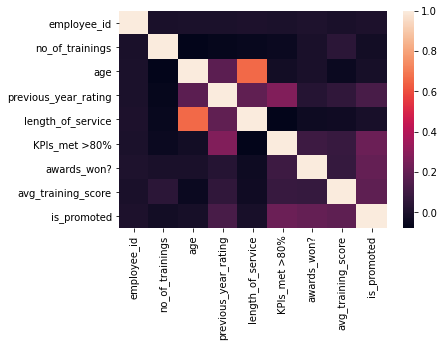

In [35]:
#Plotting a heatmap to understand the correlation between the variables (**THIS IS NOT PRESENT IN THE EDA PPT**)
sns.heatmap(dataset_eda.corr())

From the above heatmap, it can be observed that **Age** and **Length of Service** has **high correlation**. Only one of these features should be used since multicollinearity undermines statistical significance of an independent variable, Age or length of service in this case.

## **FEATURE ENGINEERING**

From the above Feature Set, employee_id has all unique values. It should be dropped.


There are 5 categories [Deparment, Region, Education, Gender, Recruitment Channel] which has to be encoded.

In [36]:
#Dropping employee_id because all unique values
X_train = X_train.iloc[:, 1:]
X_validation = X_validation.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

### Department

In [38]:
#Observing Department
X_train['department'].value_counts()

Sales & Marketing    12141
Operations            8158
Procurement           5198
Technology            5099
Analytics             3798
Finance               1862
HR                    1732
Legal                  749
R&D                    724
Name: department, dtype: int64

All values are unique in value counts. So we will perform **frequency encoding** for department categorical variable.

In [39]:
#Creating the encoding dictionary for department
department_encoder = dict(X_train['department'].value_counts(normalize=True))
department_encoder

{'Sales & Marketing': 0.30767086490458934,
 'Operations': 0.20673576442563543,
 'Procurement': 0.1317249942981678,
 'Technology': 0.12921618813512076,
 'Analytics': 0.09624692734598718,
 'Finance': 0.04718582904640024,
 'HR': 0.04389143711512633,
 'Legal': 0.01898076581941664,
 'R&D': 0.01834722890955627}

In [40]:
#Mapping the department encoder to all the three sets
X_train['department'] = X_train['department'].map(department_encoder)
X_validation['department'] = X_validation['department'].map(department_encoder)
X_test['department'] = X_test['department'].map(department_encoder)

### Region

In [41]:
#Observing Region
print(X_train['region'].nunique())

#This is just to observe no value has been repeated after normalisation
print(X_train['region'].value_counts(normalize = True).nunique()) 

34
34


All values are unique in value counts. So here also, we will perform frequency encoding for Region categorical variable

In [42]:
#Creating the encoding dictionary for region
region_encoder = dict(X_train['region'].value_counts(normalize=True))
region_encoder

{'region_2': 0.22703428701756165,
 'region_22': 0.11738171865892907,
 'region_7': 0.08831504523453536,
 'region_15': 0.05240617318364968,
 'region_13': 0.04787004890904944,
 'region_26': 0.0409264843769798,
 'region_31': 0.035326018093814145,
 'region_4': 0.030992625630369225,
 'region_27': 0.030460454626086517,
 'region_16': 0.02658320873774106,
 'region_28': 0.024125085527482833,
 'region_11': 0.024049061098299587,
 'region_23': 0.021464230506069285,
 'region_29': 0.017739033476090318,
 'region_32': 0.01642127670358075,
 'region_19': 0.016167861939636603,
 'region_20': 0.015331593218620918,
 'region_25': 0.014951471072704696,
 'region_14': 0.014698056308760548,
 'region_17': 0.014520665973999645,
 'region_5': 0.013937812016928106,
 'region_6': 0.012417323433263221,
 'region_10': 0.01208788424013583,
 'region_30': 0.011961176858163756,
 'region_8': 0.011733103570614025,
 'region_1': 0.01054205418007653,
 'region_24': 0.009325663313144624,
 'region_12': 0.008844175261650744,
 'region_9

In [43]:
#Mapping the region encoder to all the three sets
X_train['region'] = X_train['region'].map(region_encoder)
X_validation['region'] = X_validation['region'].map(region_encoder)
X_test['region'] = X_test['region'].map(region_encoder)

### Education

In [44]:
#Observing Education
X_train['education'].value_counts()

Bachelor's          26477
Master's & above    10658
Not Defined          1750
Below Secondary       576
Name: education, dtype: int64

Education has ordinal values. So we will make a custom encoder

In [45]:
#Creating the encoding dictionary for education (Higher the value, richer the education)
education_encoder = {'Not Defined': 0,
                    'Below Secondary': 1,
                    "Bachelor's": 2,
                    "Master's & above": 3}
education_encoder

{'Not Defined': 0,
 'Below Secondary': 1,
 "Bachelor's": 2,
 "Master's & above": 3}

In [46]:
#Mapping the education encoder to all the three sets
X_train['education'] = X_train['education'].map(education_encoder)
X_validation['education'] = X_validation['education'].map(education_encoder)
X_test['education'] = X_test['education'].map(education_encoder)

### Gender

In [47]:
#Observing Gender
X_train['gender'].value_counts()

m    27777
f    11684
Name: gender, dtype: int64

Gender has two categories. So, we will encode gender with labelencoder.

In [48]:
#Creating Encoder for gender (Label Encoder)
from sklearn.preprocessing import LabelEncoder
gender_encoder = LabelEncoder()
gender_encoder.fit(X_train['gender'])

LabelEncoder()

In [49]:
#Transforming the gender with label encoder
X_train['gender'] = gender_encoder.transform(X_train['gender'])
X_validation['gender'] = gender_encoder.transform(X_validation['gender'])
X_test['gender'] = gender_encoder.transform(X_test['gender'])

### Recruitment Channel

In [50]:
#Observing Recruitment Channel
X_train['recruitment_channel'].value_counts()

other       21943
sourcing    16669
referred      849
Name: recruitment_channel, dtype: int64

All values are unique in value counts. So we will perform frequency encoding for recruitment channel categorical variable.

In [51]:
#Creating the encoding dictionary for recruitment channel
rc_encoder = dict(X_train['recruitment_channel'].value_counts(normalize=True))
rc_encoder

{'other': 0.5560680165226426,
 'sourcing': 0.42241707001849926,
 'referred': 0.021514913458858115}

In [52]:
#Mapping the recruitment channel encoder to all the three sets
X_train['recruitment_channel'] = X_train['recruitment_channel'].map(rc_encoder)
X_validation['recruitment_channel'] = X_validation['recruitment_channel'].map(rc_encoder)
X_test['recruitment_channel'] = X_test['recruitment_channel'].map(rc_encoder)

## **FEATURE SELECTION**

### Wrapper Methods

The model which we will use for feature selection is **Random Forest Classifier**

#### Step Forward Feature Selection

In [54]:
#Initialising step forward feature selector
sfs_feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1, random_state=42),
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=4,
           k_features = 12)

In [55]:
#Fitting the feature selector and observing features
features_sfs = sfs_feature_selector.fit(X_train, y_train)
pd.DataFrame.from_dict(features_sfs.get_metric_dict()).T

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   23.5s finished

[2021-05-31 21:38:56] Features: 1/12 -- score: 0.6861374169578304[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   16.2s finished

[2021-05-31 21:39:12] Features: 2/12 -- score: 0.7836430181943014[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   20.6s finished

[2021-05-31 21:39:33] Features: 3/12 -- score: 0.8810392371783518[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(9,)","[0.6794320911218971, 0.6871879464521244, 0.689...",0.686137,"(KPIs_met >80%,)",0.00637043,0.00397412,0.00229446
2,"(9, 11)","[0.7851433043823631, 0.7854649807404274, 0.787...",0.783643,"(KPIs_met >80%, avg_training_score)",0.00640457,0.00399541,0.00230675
3,"(0, 9, 11)","[0.888811270954733, 0.8799661849672674, 0.8768...",0.881039,"(department, KPIs_met >80%, avg_training_score)",0.00740511,0.00461959,0.00266712
4,"(0, 9, 10, 11)","[0.8911424697948771, 0.881561230003298, 0.8760...",0.882888,"(department, KPIs_met >80%, awards_won?, avg_t...",0.0086607,0.00540287,0.00311935
5,"(0, 3, 9, 10, 11)","[0.8827890667741377, 0.8777641534663463, 0.873...",0.878533,"(department, gender, KPIs_met >80%, awards_won...",0.00509911,0.00318102,0.00183656
6,"(0, 3, 5, 9, 10, 11)","[0.8787648754186728, 0.8726764997347765, 0.867...",0.874274,"(department, gender, no_of_trainings, KPIs_met...",0.00702972,0.0043854,0.00253191
7,"(0, 3, 5, 7, 9, 10, 11)","[0.8741198054878996, 0.8517383905229543, 0.863...",0.86202,"(department, gender, no_of_trainings, previous...",0.0129471,0.0080769,0.0046632
8,"(0, 3, 5, 6, 7, 9, 10, 11)","[0.8614630201813117, 0.845337093851205, 0.8590...",0.852431,"(department, gender, no_of_trainings, age, pre...",0.0126294,0.0078787,0.00454877
9,"(0, 1, 3, 5, 6, 7, 9, 10, 11)","[0.880064910917845, 0.8786587795244791, 0.8747...",0.87609,"(department, region, gender, no_of_trainings, ...",0.00573396,0.00357706,0.00206522
10,"(0, 1, 3, 5, 6, 7, 8, 9, 10, 11)","[0.8874787215884938, 0.8854666180834926, 0.882...",0.88248,"(department, region, gender, no_of_trainings, ...",0.00782091,0.00487898,0.00281688


Sfs feature selection suggests **[department, KPI's met, awards won, avg training score]** as features.

#### Step Backwards Feature Selection

In [56]:
#Initialising Step Backwards feature selector
sbs_feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1, random_state=42),
           forward=False,
           verbose=2,
           scoring='roc_auc',
           cv=4)

In [57]:
#Fitting the step backward feature selector
features_sbs = sbs_feature_selector.fit(X_train, y_train)
pd.DataFrame.from_dict(features_sbs.get_metric_dict()).T

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   51.1s finished

[2021-05-31 21:44:19] Features: 11/1 -- score: 0.8816362762294403[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   48.6s finished

[2021-05-31 21:45:08] Features: 10/1 -- score: 0.8824805387547944[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   44.5s finished

[2021-05-31 21:45:52] Features: 9/1 -- score: 0.8802792488228388[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
12,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)","[0.8830839630055792, 0.881480467406867, 0.8851...",0.880882,"(department, region, education, gender, recrui...",0.006817,0.0042527,0.0024553
11,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11)","[0.8806134282919965, 0.8866500532656287, 0.885...",0.881636,"(department, region, gender, recruitment_chann...",0.00850691,0.00530693,0.00306396
10,"(0, 1, 3, 5, 6, 7, 8, 9, 10, 11)","[0.8874787215884937, 0.8854666180834926, 0.882...",0.882481,"(department, region, gender, no_of_trainings, ...",0.0078209,0.00487897,0.00281688
9,"(0, 1, 3, 6, 7, 8, 9, 10, 11)","[0.8823377665114956, 0.8859441115035827, 0.879...",0.880279,"(department, region, gender, age, previous_yea...",0.0075152,0.00468827,0.00270677
8,"(0, 1, 3, 6, 7, 8, 9, 11)","[0.8759527179581031, 0.8781030574912734, 0.872...",0.873676,"(department, region, gender, age, previous_yea...",0.00614057,0.00383072,0.00221167
7,"(0, 1, 6, 7, 8, 9, 11)","[0.8719759020975661, 0.8733548925500111, 0.871...",0.869639,"(department, region, age, previous_year_rating...",0.00703492,0.00438865,0.00253379
6,"(0, 1, 6, 7, 9, 11)","[0.8645522918382406, 0.8661891775781719, 0.862...",0.861578,"(department, region, age, previous_year_rating...",0.00815574,0.00508786,0.00293747
5,"(0, 1, 6, 9, 11)","[0.8490449294916349, 0.8555813386553046, 0.840...",0.845004,"(department, region, age, KPIs_met >80%, avg_t...",0.0126629,0.00789961,0.00456084
4,"(0, 1, 9, 11)","[0.8518321661439138, 0.8399100163032589, 0.851...",0.847506,"(department, region, KPIs_met >80%, avg_traini...",0.00781355,0.00487439,0.00281423
3,"(0, 9, 11)","[0.8887391044473908, 0.8802592173967962, 0.876...",0.881116,"(department, KPIs_met >80%, avg_training_score)",0.00732466,0.0045694,0.00263814


Sbs feature selection suggests we take 10 features. [department, KPI's, avg training score] are good features according to both sbs and sfs. 

#### INFERENCE

Analysing both, We will consider the features **[department, KPI's met, Awards won, Avg Training Score]**

In [58]:
#Dropping all the columns except selected features
X_train_W = X_train.drop(X_train.columns.difference(['department', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']), 1)
X_validation_W = X_validation.drop(X_validation.columns.difference(['department', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']), 1)
X_test_W = X_test.drop(X_test.columns.difference(['department', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']), 1)

In [59]:
#Feature train set
X_train_W

,department,KPIs_met >80%,awards_won?,avg_training_score
50114,0.307671,0,0,52
5038,0.047186,0,0,71
26158,0.129216,0,0,79
48838,0.047186,0,0,59
13179,0.206736,0,0,55
...,...,...,...,...
44732,0.131725,0,0,67
54343,0.131725,0,0,68
38158,0.206736,1,0,65
860,0.096247,0,0,86


### Embedded Methods

#### Random Forest Feature Importance

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    4.8s finished


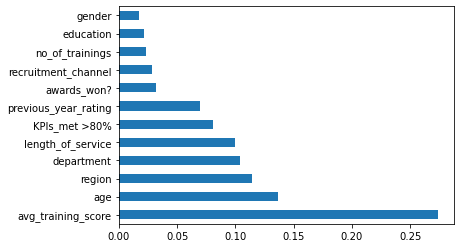

In [60]:
#Finding Feature Importance using Random Forest Classifier and displaying all the features importance
model = RandomForestClassifier(random_state = 42, verbose = 1, n_estimators=200, criterion='entropy', max_features=2)
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

From the above plot, **[gender, education, no of trainings, recruitment channel, awards won]** aren't considered good features. Rest all are acceptable.

In [61]:
#Creating a featureset based on these
X_trainF = X_train.drop(columns=['gender', 'education', 'no_of_trainings', 'recruitment_channel', 'awards_won?'], axis=1)
X_validationF = X_validation.drop(columns=['gender', 'education', 'no_of_trainings', 'recruitment_channel', 'awards_won?'], axis=1)
X_testF = X_test.drop(columns=['gender', 'education', 'no_of_trainings', 'recruitment_channel', 'awards_won?'], axis=1)

In [62]:
#Feature Train Set
X_trainF

,department,region,age,previous_year_rating,length_of_service,KPIs_met >80%,avg_training_score
50114,0.307671,0.014698,41,4.0,6,0,52
5038,0.047186,0.088315,33,5.0,7,0,71
26158,0.129216,0.005018,33,1.0,2,0,79
48838,0.047186,0.227034,27,3.0,5,0,59
13179,0.206736,0.030460,32,3.0,3,0,55
...,...,...,...,...,...,...,...
44732,0.131725,0.117382,36,3.0,4,0,67
54343,0.131725,0.227034,27,0.0,1,0,68
38158,0.206736,0.024049,34,5.0,7,1,65
860,0.096247,0.052406,35,5.0,3,0,86


## **MODEL TRAINING**

### **With WRAPPER method suggested features**

#### Logistic Regression Classifier

In [64]:
#Fitting Logistic Regression in training Set
classifier = LogisticRegression()
classifier.fit(X_train_W, y_train)

LogisticRegression()

In [65]:
#Predicting Test Set Results
y_pred = classifier.predict(X_test_W)

In [66]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8433   30]
 [ 665   81]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8463
           1       0.73      0.11      0.19       746

    accuracy                           0.92      9209
   macro avg       0.83      0.55      0.57      9209
weighted avg       0.91      0.92      0.90      9209



#### KNN Classifier

In [67]:
#Fitting KNN to the training Set
classifier = KNeighborsClassifier()
classifier.fit(X_train_W, y_train)

KNeighborsClassifier()

In [68]:
#Predicting Test Set Results
y_pred = classifier.predict(X_test_W)

In [69]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8376   87]
 [ 487  259]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8463
           1       0.75      0.35      0.47       746

    accuracy                           0.94      9209
   macro avg       0.85      0.67      0.72      9209
weighted avg       0.93      0.94      0.93      9209



#### SVM Classifier

##### Linear Kernel

In [70]:
# Fitting Linear Kernel SVM to the Training Set
classifier = SVC(kernel = 'linear')
classifier.fit(X_train_W, y_train)

SVC(kernel='linear')

In [71]:
#Predicting Test Set Results
y_pred = classifier.predict(X_test_W)

In [72]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8463    0]
 [ 746    0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8463
           1       0.00      0.00      0.00       746

    accuracy                           0.92      9209
   macro avg       0.46      0.50      0.48      9209
weighted avg       0.84      0.92      0.88      9209



##### Gaussian Kernel

In [73]:
# Fitting Gaussian Kernel SVM to the Training Set
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train_W, y_train)

SVC()

In [74]:
#Predicting Test Set Results
y_pred = classifier.predict(X_test_W)

In [75]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8463    0]
 [ 746    0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8463
           1       0.00      0.00      0.00       746

    accuracy                           0.92      9209
   macro avg       0.46      0.50      0.48      9209
weighted avg       0.84      0.92      0.88      9209



##### Poly Kernel

In [76]:
# Fitting Gaussian Kernel SVM to the Training Set
classifier = SVC(kernel = 'poly')
classifier.fit(X_train_W, y_train)

SVC(kernel='poly')

In [77]:
#Predicting Test Set Results
y_pred = classifier.predict(X_test_W)

In [78]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8463    0]
 [ 746    0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8463
           1       0.00      0.00      0.00       746

    accuracy                           0.92      9209
   macro avg       0.46      0.50      0.48      9209
weighted avg       0.84      0.92      0.88      9209



#### Decision Tree Classifier

In [79]:
# Fitting Decision Tree Classifier to the Training Set
classifier = DecisionTreeClassifier()
classifier.fit(X_train_W, y_train)

DecisionTreeClassifier()

In [80]:
# Predicting the Test Set Results
y_pred = classifier.predict(X_test_W)

In [81]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8439   24]
 [ 496  250]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8463
           1       0.91      0.34      0.49       746

    accuracy                           0.94      9209
   macro avg       0.93      0.67      0.73      9209
weighted avg       0.94      0.94      0.93      9209



#### Random Forest Classifier

In [82]:
#Fitting Random Forest Classifier to the Training Set
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_W, y_train)

RandomForestClassifier(random_state=42)

In [83]:
# Predicting the Test Set Results
y_pred = classifier.predict(X_test_W)

In [84]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8432   31]
 [ 492  254]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8463
           1       0.89      0.34      0.49       746

    accuracy                           0.94      9209
   macro avg       0.92      0.67      0.73      9209
weighted avg       0.94      0.94      0.93      9209



#### XGBoost Classifier

In [85]:
# Fitting XGBoost to the Training Set
classifier = XGBClassifier()
classifier.fit(X_train_W, y_train)

[22:20:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [86]:
# Predicting the Test Set Results
y_pred = classifier.predict(X_test_W)

In [87]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8439   24]
 [ 491  255]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      8463
           1       0.91      0.34      0.50       746

    accuracy                           0.94      9209
   macro avg       0.93      0.67      0.73      9209
weighted avg       0.94      0.94      0.93      9209



### **With EMBEDDED suggested features**

#### Logistic Regression Classifier

In [88]:
#Fitting Logistic Regression in training Set
classifier = LogisticRegression()
classifier.fit(X_trainF, y_train)

LogisticRegression()

In [89]:
#Predicting Test Set Results
y_pred = classifier.predict(X_testF)

In [90]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8463    0]
 [ 679   67]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8463
           1       1.00      0.09      0.16       746

    accuracy                           0.93      9209
   macro avg       0.96      0.54      0.56      9209
weighted avg       0.93      0.93      0.90      9209



#### KNN Classifier

In [91]:
#Fitting KNN to the training Set
classifier = KNeighborsClassifier()
classifier.fit(X_trainF, y_train)

KNeighborsClassifier()

In [92]:
#Predicting Test Set Results
y_pred = classifier.predict(X_testF)

In [93]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8364   99]
 [ 637  109]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8463
           1       0.52      0.15      0.23       746

    accuracy                           0.92      9209
   macro avg       0.73      0.57      0.59      9209
weighted avg       0.90      0.92      0.90      9209



#### SVM Classifier

##### Linear kernel

In [94]:
# Fitting Linear Kernel SVM to the Training Set
classifier = SVC(kernel = 'linear')
classifier.fit(X_trainF, y_train)

SVC(kernel='linear')

In [95]:
#Predicting Test Set Results
y_pred = classifier.predict(X_testF)

In [96]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8463    0]
 [ 746    0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8463
           1       0.00      0.00      0.00       746

    accuracy                           0.92      9209
   macro avg       0.46      0.50      0.48      9209
weighted avg       0.84      0.92      0.88      9209



##### Gaussian Kernel

In [97]:
# Fitting Gaussian Kernel SVM to the Training Set
classifier = SVC(kernel = 'rbf')
classifier.fit(X_trainF, y_train)

SVC()

In [98]:
#Predicting Test Set Results
y_pred = classifier.predict(X_testF)

In [99]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8463    0]
 [ 746    0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8463
           1       0.00      0.00      0.00       746

    accuracy                           0.92      9209
   macro avg       0.46      0.50      0.48      9209
weighted avg       0.84      0.92      0.88      9209



##### Poly Kernel

In [100]:
# Fitting Gaussian Kernel SVM to the Training Set
classifier = SVC(kernel = 'poly')
classifier.fit(X_trainF, y_train)

SVC(kernel='poly')

In [101]:
#Predicting Test Set Results
y_pred = classifier.predict(X_testF)

In [102]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8463    0]
 [ 746    0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8463
           1       0.00      0.00      0.00       746

    accuracy                           0.92      9209
   macro avg       0.46      0.50      0.48      9209
weighted avg       0.84      0.92      0.88      9209



#### Decision Tree Classifier

In [103]:
# Fitting Decision Tree Classifier to the Training Set
classifier = DecisionTreeClassifier()
classifier.fit(X_trainF, y_train)

DecisionTreeClassifier()

In [104]:
# Predicting the Test Set Results
y_pred = classifier.predict(X_testF)

In [105]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7928  535]
 [ 414  332]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      8463
           1       0.38      0.45      0.41       746

    accuracy                           0.90      9209
   macro avg       0.67      0.69      0.68      9209
weighted avg       0.90      0.90      0.90      9209



#### Random Forest Classifier

In [106]:
#Fitting Random Forest Classifier to the Training Set
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_trainF, y_train)

RandomForestClassifier(random_state=42)

In [107]:
# Predicting the Test Set Results
y_pred = classifier.predict(X_testF)

In [108]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8376   87]
 [ 507  239]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      8463
           1       0.73      0.32      0.45       746

    accuracy                           0.94      9209
   macro avg       0.84      0.66      0.71      9209
weighted avg       0.93      0.94      0.92      9209



#### XGBoost Classifier

In [109]:
# Fitting XGBoost to the Training Set
classifier = XGBClassifier()
classifier.fit(X_trainF, y_train)

[22:27:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [110]:
# Predicting the Test Set Results
y_pred = classifier.predict(X_testF)

In [111]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8431   32]
 [ 492  254]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8463
           1       0.89      0.34      0.49       746

    accuracy                           0.94      9209
   macro avg       0.92      0.67      0.73      9209
weighted avg       0.94      0.94      0.93      9209



### **INFERENCE** 

Based on all the Model Scores, **Random Forest** and **XGBoost** performs very good on both the subset of features (**Wrapper** suggested & **Embedded** suggested). So, we will focus on these models and try to make them perform even better with hyper-parameter tuning.

## **HYPER-PARAMETER TUNING**

### **Wrapper** suggested Features

#### Random Forest

##### Default Parameters

In [112]:
#Fitting Random Forest Classifier with default parameters to the Training Set
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_W, y_train)

RandomForestClassifier(random_state=42)

In [113]:
#Checking Training Accuracy
y_pred = classifier.predict(X_train_W)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[35989    54]
 [ 2194  1224]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     36043
           1       0.96      0.36      0.52      3418

    accuracy                           0.94     39461
   macro avg       0.95      0.68      0.75     39461
weighted avg       0.94      0.94      0.93     39461



In [114]:
#Checking Validation Accuracy
y_pred = classifier.predict(X_validation_W)
print(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))

[[5613   21]
 [ 318  186]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5634
           1       0.90      0.37      0.52       504

    accuracy                           0.94      6138
   macro avg       0.92      0.68      0.75      6138
weighted avg       0.94      0.94      0.93      6138



In [115]:
#Checking test Accuracy
y_pred = classifier.predict(X_test_W)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8432   31]
 [ 492  254]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8463
           1       0.89      0.34      0.49       746

    accuracy                           0.94      9209
   macro avg       0.92      0.67      0.73      9209
weighted avg       0.94      0.94      0.93      9209



##### Grid Search Cross Validation

In [117]:
#Making a matrix of hyperparameters
parameters = [{'n_estimators': [10, 50, 75, 100, 200, 300, 400],
               'max_depth': [1,2,3,4,5, None],
               'min_samples_split': [2, 3],
               'min_samples_leaf': [1, 2],
               'max_leaf_nodes': [1, 2, None]}]

parameters

[{'n_estimators': [10, 50, 75, 100, 200, 300, 400],
  'max_depth': [1, 2, 3, 4, 5, None],
  'min_samples_split': [2, 3],
  'min_samples_leaf': [1, 2],
  'max_leaf_nodes': [1, 2, None]}]

In [118]:
#Fitting grid search CV with the validation set and our matrix of hyperparameters
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='roc_auc', n_jobs=-1)
grid_search = grid_search.fit(X_validation_W, y_validation)

In [119]:
#Observing roc_auc score (higher the better)
grid_search.best_score_

0.8821157396922858

In [120]:
#Finding the best hyperparameters
grid_search.best_params_

{'max_depth': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

##### NEW HYPER-PARAMETERS

In [121]:
#Fitting Random Forest Classifier to the Training Set with new hyperparameters
classifier = RandomForestClassifier(random_state=42, n_estimators = 200, min_samples_leaf=2, min_samples_split=2)
classifier.fit(X_train_W, y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=200, random_state=42)

In [122]:
#Checking Training Accuracy
y_pred = classifier.predict(X_train_W)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[35993    50]
 [ 2204  1214]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     36043
           1       0.96      0.36      0.52      3418

    accuracy                           0.94     39461
   macro avg       0.95      0.68      0.74     39461
weighted avg       0.94      0.94      0.93     39461



In [123]:
#Checking Validation Accuracy
y_pred = classifier.predict(X_validation_W)
print(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))

[[5615   19]
 [ 318  186]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5634
           1       0.91      0.37      0.52       504

    accuracy                           0.95      6138
   macro avg       0.93      0.68      0.75      6138
weighted avg       0.94      0.95      0.93      6138



In [124]:
#Checking test Accuracy
y_pred = classifier.predict(X_test_W)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8435   28]
 [ 494  252]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8463
           1       0.90      0.34      0.49       746

    accuracy                           0.94      9209
   macro avg       0.92      0.67      0.73      9209
weighted avg       0.94      0.94      0.93      9209



#### XGBoost

##### Default Parameters

In [125]:
# Fitting XGBoost to the Training Set
classifier = XGBClassifier()
classifier.fit(X_train_W, y_train)

[22:35:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [126]:
#Checking Training Accuracy
y_pred = classifier.predict(X_train_W)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[35997    46]
 [ 2207  1211]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     36043
           1       0.96      0.35      0.52      3418

    accuracy                           0.94     39461
   macro avg       0.95      0.68      0.74     39461
weighted avg       0.94      0.94      0.93     39461



In [127]:
#Checking Validation Accuracy
y_pred = classifier.predict(X_validation_W)
print(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))

[[5615   19]
 [ 318  186]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5634
           1       0.91      0.37      0.52       504

    accuracy                           0.95      6138
   macro avg       0.93      0.68      0.75      6138
weighted avg       0.94      0.95      0.93      6138



In [128]:
#Checking test Accuracy
y_pred = classifier.predict(X_test_W)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8439   24]
 [ 491  255]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      8463
           1       0.91      0.34      0.50       746

    accuracy                           0.94      9209
   macro avg       0.93      0.67      0.73      9209
weighted avg       0.94      0.94      0.93      9209



##### Grid Search Cross Validation

In [129]:
#Making a matrix of hyperparameters
parameters = [{'learning_rate': [0.1, 0.2, 0.3, 0.4],
                'n_estimators': [10, 50, 75, 100, 150, 200 , 300, 400],
               'gamma': [0, 0.1, 0.2, 0.3, 0.4]}]

parameters

[{'learning_rate': [0.1, 0.2, 0.3, 0.4],
  'n_estimators': [10, 50, 75, 100, 150, 200, 300, 400],
  'gamma': [0, 0.1, 0.2, 0.3, 0.4]}]

In [130]:
#Fitting grid search CV with the validation set
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='roc_auc', n_jobs=-1)
grid_search = grid_search.fit(X_validation_W, y_validation)

[22:38:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [131]:
#Observing roc_auc score (higher the better)
grid_search.best_score_

0.886238359243276

In [132]:
#Finding the best hyperparameters
grid_search.best_params_

{'gamma': 0.3, 'learning_rate': 0.4, 'n_estimators': 10}

##### NEW HYPER-PARAMETERS

In [133]:
# Fitting XGBoost to the Training Set
classifier = XGBClassifier(learning_rate=0.3, n_estimators=150, max_depth=4,
                      gamma=0.3)
classifier.fit(X_train_W, y_train)

[22:46:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [134]:
#Checking Training Accuracy
y_pred = classifier.predict(X_train_W)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[35997    46]
 [ 2225  1193]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     36043
           1       0.96      0.35      0.51      3418

    accuracy                           0.94     39461
   macro avg       0.95      0.67      0.74     39461
weighted avg       0.94      0.94      0.93     39461



In [135]:
#Checking Validation Accuracy
y_pred = classifier.predict(X_validation_W)
print(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))

[[5618   16]
 [ 317  187]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5634
           1       0.92      0.37      0.53       504

    accuracy                           0.95      6138
   macro avg       0.93      0.68      0.75      6138
weighted avg       0.94      0.95      0.93      6138



In [136]:
#Checking test Accuracy
y_pred = classifier.predict(X_test_W)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8444   19]
 [ 493  253]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8463
           1       0.93      0.34      0.50       746

    accuracy                           0.94      9209
   macro avg       0.94      0.67      0.73      9209
weighted avg       0.94      0.94      0.93      9209



#### Conclusion

**XGBoost** outperforms Random forest in this subset of features in terms of precision, Recall and F1 score.

### **Embedded** suggested Features

#### Random Forest

##### Default Parameters

In [137]:
#Fitting Random Forest Classifier with default parameters to the Training Set
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_trainF, y_train)

RandomForestClassifier(random_state=42)

In [138]:
#Checking Training Accuracy
y_pred = classifier.predict(X_trainF)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[36022    21]
 [   77  3341]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36043
           1       0.99      0.98      0.99      3418

    accuracy                           1.00     39461
   macro avg       1.00      0.99      0.99     39461
weighted avg       1.00      1.00      1.00     39461



In [139]:
#Checking Validation Accuracy
y_pred = classifier.predict(X_validationF)
print(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))

[[5577   57]
 [ 341  163]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      5634
           1       0.74      0.32      0.45       504

    accuracy                           0.94      6138
   macro avg       0.84      0.66      0.71      6138
weighted avg       0.93      0.94      0.92      6138



In [140]:
#Checking test Accuracy
y_pred = classifier.predict(X_testF)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8376   87]
 [ 507  239]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      8463
           1       0.73      0.32      0.45       746

    accuracy                           0.94      9209
   macro avg       0.84      0.66      0.71      9209
weighted avg       0.93      0.94      0.92      9209



##### Grid Search Cross Validation

In [142]:
#Making a matrix of hyperparameters
parameters = [{'n_estimators': [10, 50, 75, 100, 200, 300],
               'max_depth': [1,2,3,4,5, None],
               'min_samples_split': [2, 3],
               'min_samples_leaf': [1, 2],
               'max_leaf_nodes': [1, 2, None]}]

parameters

[{'n_estimators': [10, 50, 75, 100, 200, 300],
  'max_depth': [1, 2, 3, 4, 5, None],
  'min_samples_split': [2, 3],
  'min_samples_leaf': [1, 2],
  'max_leaf_nodes': [1, 2, None]}]

In [143]:
#Fitting grid search CV with the validation set
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='roc_auc', n_jobs=-1)
grid_search = grid_search.fit(X_validationF, y_validation)

In [144]:
#Observing roc_auc score (higher the better)
grid_search.best_score_

0.8719898238111836

In [145]:
#Finding the best hyperparameters
grid_search.best_params_

{'max_depth': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 300}

##### NEW HYPER-PARAMETERS

In [146]:
#Fitting Random Forest Classifier to the Training Set with new hyperparameters
classifier = RandomForestClassifier(random_state=42, n_estimators = 300, min_samples_leaf=1, min_samples_split=3)
classifier.fit(X_trainF, y_train)

RandomForestClassifier(min_samples_split=3, n_estimators=300, random_state=42)

In [147]:
#Checking Training Accuracy
y_pred = classifier.predict(X_trainF)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[36035     8]
 [  354  3064]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     36043
           1       1.00      0.90      0.94      3418

    accuracy                           0.99     39461
   macro avg       0.99      0.95      0.97     39461
weighted avg       0.99      0.99      0.99     39461



In [148]:
#Checking Validation Accuracy
y_pred = classifier.predict(X_validationF)
print(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))

[[5594   40]
 [ 344  160]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      5634
           1       0.80      0.32      0.45       504

    accuracy                           0.94      6138
   macro avg       0.87      0.66      0.71      6138
weighted avg       0.93      0.94      0.92      6138



In [149]:
#Checking test Accuracy
y_pred = classifier.predict(X_testF)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8412   51]
 [ 514  232]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      8463
           1       0.82      0.31      0.45       746

    accuracy                           0.94      9209
   macro avg       0.88      0.65      0.71      9209
weighted avg       0.93      0.94      0.93      9209



#### XGBoost

##### Default Parameters

In [150]:
# Fitting XGBoost to the Training Set
classifier = XGBClassifier()
classifier.fit(X_trainF, y_train)

[22:57:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [151]:
#Checking Training Accuracy
y_pred = classifier.predict(X_trainF)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[36023    20]
 [ 2049  1369]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     36043
           1       0.99      0.40      0.57      3418

    accuracy                           0.95     39461
   macro avg       0.97      0.70      0.77     39461
weighted avg       0.95      0.95      0.94     39461



In [152]:
#Checking Validation Accuracy
y_pred = classifier.predict(X_validationF)
print(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))

[[5614   20]
 [ 325  179]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5634
           1       0.90      0.36      0.51       504

    accuracy                           0.94      6138
   macro avg       0.92      0.68      0.74      6138
weighted avg       0.94      0.94      0.93      6138



In [153]:
#Checking test Accuracy
y_pred = classifier.predict(X_testF)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8431   32]
 [ 492  254]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8463
           1       0.89      0.34      0.49       746

    accuracy                           0.94      9209
   macro avg       0.92      0.67      0.73      9209
weighted avg       0.94      0.94      0.93      9209



##### Grid Search Cross Validation

In [154]:
#Making a matrix of hyperparameters
parameters = [{'learning_rate': [0.1, 0.2, 0.3, 0.4],
                'n_estimators': [10, 50, 75, 100, 150, 200 , 300, 400],
               'gamma': [0, 0.1, 0.2, 0.3, 0.4]}]

parameters

[{'learning_rate': [0.1, 0.2, 0.3, 0.4],
  'n_estimators': [10, 50, 75, 100, 150, 200, 300, 400],
  'gamma': [0, 0.1, 0.2, 0.3, 0.4]}]

In [155]:
#Fitting grid search CV with the validation set
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='roc_auc', n_jobs=-1)
grid_search = grid_search.fit(X_validationF, y_validation)

[23:01:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [156]:
#Observing roc_auc score (higher the better)
grid_search.best_score_

0.8870680846869906

In [157]:
#Finding the best hyperparameters
grid_search.best_params_

{'gamma': 0, 'learning_rate': 0.4, 'n_estimators': 10}

##### NEW HYPER-PARAMETERS

In [158]:
# Fitting XGBoost to the Training Set
classifier = XGBClassifier(learning_rate=0.1, n_estimators=200, gamma=0.2)
classifier.fit(X_trainF, y_train)

[23:02:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [159]:
#Checking Training Accuracy
y_pred = classifier.predict(X_trainF)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[36021    22]
 [ 2159  1259]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     36043
           1       0.98      0.37      0.54      3418

    accuracy                           0.94     39461
   macro avg       0.96      0.68      0.75     39461
weighted avg       0.95      0.94      0.93     39461



In [160]:
#Checking Validation Accuracy
y_pred = classifier.predict(X_validationF)
print(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))

[[5618   16]
 [ 325  179]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5634
           1       0.92      0.36      0.51       504

    accuracy                           0.94      6138
   macro avg       0.93      0.68      0.74      6138
weighted avg       0.94      0.94      0.93      6138



In [161]:
#Checking test Accuracy
y_pred = classifier.predict(X_testF)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8446   17]
 [ 492  254]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8463
           1       0.94      0.34      0.50       746

    accuracy                           0.94      9209
   macro avg       0.94      0.67      0.74      9209
weighted avg       0.94      0.94      0.93      9209



#### Conclusion

**XGBoost** out performs Random Forest in this subset of features in terms f1 score, recall and precision

## **FINAL MODEL**

Based on Precision, Recall and F1 Score, **XGBoost** on the **wrapper suggested** subset of features performs the best. So we will consider that model with those specific hyper-parameters.

In [162]:
#FINAL MODEL
model = XGBClassifier(learning_rate=0.3, n_estimators=150, max_depth=4,
                      gamma=0.3)
model.fit(X_train_W, y_train)

[23:03:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Test set Predictions

In [163]:
# Loading the test set
test = pd.read_csv('test.csv')
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [164]:
#Observing if any null
test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [165]:
#Handling nulls (using the same null imputation mechanism used for train data)
test['education'].fillna(value = 'Not Defined', inplace=True)
test.fillna(value=0, inplace = True)

In [166]:
#Feature encoding our selected features and dropping all other features(same feature encoding techniques used for train data)
test['department'] = test['department'].map(department_encoder)
test = test.drop(test.columns.difference(['department', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']), 1)

In [170]:
#Test Feature Set
test

,department,KPIs_met >80%,awards_won?,avg_training_score
0,0.129216,1,0,77
1,0.043891,0,0,51
2,0.307671,0,0,47
3,0.131725,0,0,65
4,0.047186,0,0,61
...,...,...,...,...
23485,0.018981,0,0,61
23486,0.129216,0,0,74
23487,0.043891,0,0,50
23488,0.131725,0,0,70


In [171]:
#TEST SET PREDICTIONS
predictions = model.predict(test)
pd.Series(predictions).value_counts()

0    22789
1      701
dtype: int64